In [4]:
import numpy as np
import matplotlib.pyplot as plt

from keras.utils import to_categorical

from keras.models import Sequential
from keras.layers import Dense, Input

from keras.callbacks import History 

from keras import optimizers

In [2]:
from keras.datasets import fashion_mnist

# Caricamento del dataset

labels = ["T-shirt/top","Pantalone","Pullover","Vestito","Cappotto","Sandalo","Maglietta","Sneaker","Borsa","Stivaletto"]

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Encoding delle immagini

X_train = X_train.reshape(X_train.shape[0],28*28)
X_test = X_test.reshape(X_test.shape[0],28*28)

# Normalizzazione

X_train = X_train/255
X_test = X_test/255

# Encoding del target

num_classes=10

y_train_dummy = to_categorical(y_train, num_classes)
y_test_dummy = to_categorical(y_test, num_classes)

In [5]:
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=["accuracy"])

model.fit(X_train, y_train_dummy, epochs=100, batch_size=512)
    
metrics_train = model.evaluate(X_train, y_train_dummy, verbose=0)
metrics_test = model.evaluate(X_test, y_test_dummy, verbose=0)

print("Train Accuracy = %.4f - Train Loss = %.4f" % (metrics_train[1], metrics_train[0]))
print("Test Accuracy = %.4f - Test Loss = %.4f" % (metrics_test[1], metrics_test[0]))

Epoch 1/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7101 - loss: 0.8822
Epoch 2/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8540 - loss: 0.4083
Epoch 3/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8736 - loss: 0.3515
Epoch 4/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8841 - loss: 0.3192
Epoch 5/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8913 - loss: 0.2974
Epoch 6/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9004 - loss: 0.2708
Epoch 7/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9010 - loss: 0.2647
Epoch 8/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9074 - loss: 0.2498
Epoch 9/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9015 - loss: 0.2629
Epoch 10/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9138 - loss: 0.2334
Epoch 11/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9166 - loss: 0.2244
Epoch 12/100
118/118 ━━━━━━━━━━━━━━━━━━━━

#### Classico caso di overfitting poichè la loss del test è di gran lunga più grande rispetto al train

Applico la regolarizzazione l2

In [6]:
from keras.regularizers import l2

model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.01)))       #inserisco il parametro labda in queso strato
model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.01)))       #e in questo strato
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=["accuracy"])

model.fit(X_train, y_train_dummy, epochs=100, batch_size=512)
    
metrics_train = model.evaluate(X_train, y_train_dummy, verbose=0)
metrics_test = model.evaluate(X_test, y_test_dummy, verbose=0)

print("Train Accuracy = %.4f - Train Loss = %.4f" % (metrics_train[1], metrics_train[0]))
print("Test Accuracy = %.4f - Test Loss = %.4f" % (metrics_test[1], metrics_test[0]))

Epoch 1/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6983 - loss: 6.1707
Epoch 2/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8225 - loss: 1.0945
Epoch 3/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8356 - loss: 0.7343
Epoch 4/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8379 - loss: 0.6370
Epoch 5/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8474 - loss: 0.5753
Epoch 6/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8463 - loss: 0.5626
Epoch 7/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8499 - loss: 0.5392
Epoch 8/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8549 - loss: 0.5137
Epoch 9/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8569 - loss: 0.5007
Epoch 10/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8611 - loss: 0.4870
Epoch 11/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8620 - loss: 0.4817
Epoch 12/100
118/118 ━━━━━━━━━━━━━━━━━

prestazioni peggiori ma overfitting risolto

Regolarizzazione l1 ed l2 insieme

In [7]:
from keras.regularizers import l1_l2

model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.01)))       #lascio il parametro l2 labda in queso strato
model.add(Dense(256, activation='relu', kernel_regularizer=l1_l2(l1=0.0001, l2=0.01)))       #inserisco il parametro per l1 ed l2 in questo strato
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=["accuracy"])

model.fit(X_train, y_train_dummy, epochs=100, batch_size=512)
    
metrics_train = model.evaluate(X_train, y_train_dummy, verbose=0)
metrics_test = model.evaluate(X_test, y_test_dummy, verbose=0)

print("Train Accuracy = %.4f - Train Loss = %.4f" % (metrics_train[1], metrics_train[0]))
print("Test Accuracy = %.4f - Test Loss = %.4f" % (metrics_test[1], metrics_test[0]))

Epoch 1/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6919 - loss: 6.4985
Epoch 2/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8185 - loss: 1.1073
Epoch 3/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8235 - loss: 0.7704
Epoch 4/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8373 - loss: 0.6568
Epoch 5/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8369 - loss: 0.6173
Epoch 6/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8382 - loss: 0.5941
Epoch 7/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8481 - loss: 0.5516
Epoch 8/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8530 - loss: 0.5321
Epoch 9/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8536 - loss: 0.5196
Epoch 10/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8589 - loss: 0.5067
Epoch 11/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8605 - loss: 0.4982
Epoch 12/100
118/118 ━━━━━━━━━━━━━━━━━

### Utilizziamo il modello creato su un dataset sconosciuto

importiamo un immagine per vedere se il modello la riconosce

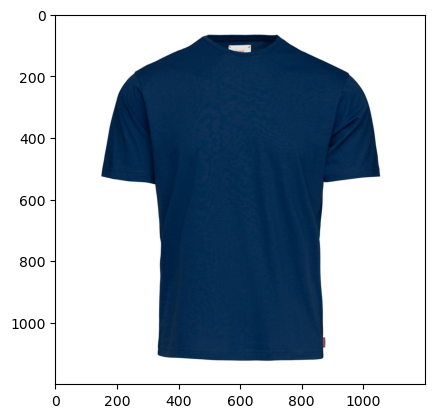

In [8]:
from skimage import io

url = "https://cdn.shopify.com/s/files/1/0012/9892/3622/products/3003103_002_1_0_390e8693-e6d4-4abe-8936-58d8dc3aa630_1200x.jpg?v=1581463570"
image = io.imread(url)
plt.imshow(image)

prima di far valutare al modello l'immagine devo applicare le stesse trasformazioni applicate per addestrare il modello

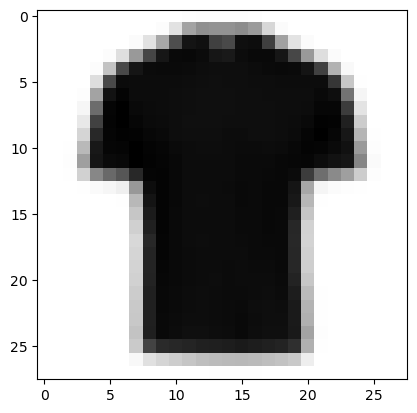

In [9]:
from skimage.transform import resize
from skimage.color import rgb2gray

image_small = resize(image, (28,28))        #faccio un reshape in dimensioni 28*28
image_grey = rgb2gray(image_small)          #la riporto in scala di grigi
x = image_grey.reshape(1, 28*28)            #codifichiamo la matrice dell'immagine in un singolo vettore
plt.imshow(x.reshape(28,28), cmap='grey')   #visualizzo l'immagine

l'unica differenza di questo esempio con uno a caso all'interno del dataset fashion MNIST è lo sfondo nero che qui è bianco

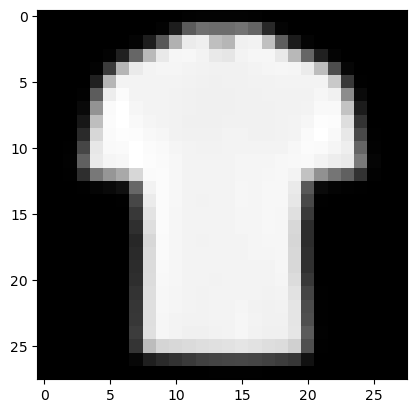

In [10]:
x = 1 - x       #dato che lo 0 significa pixel totalmente nero e 1 bianco, inverto togliendo 1
plt.imshow(x.reshape(28,28), cmap='grey')

adesso il modello è pronto per poter avviare la previsione

In [11]:
pred = np.argmax(model.predict(x), axis=-1)     #lavora sull'ultima dimensione(axis=1) trivando il massimo (argmax)
pred        #ha classificato l'immagine come appartenente alla classe zero -> CORRETTO

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


array([0])

provo un altro esempio

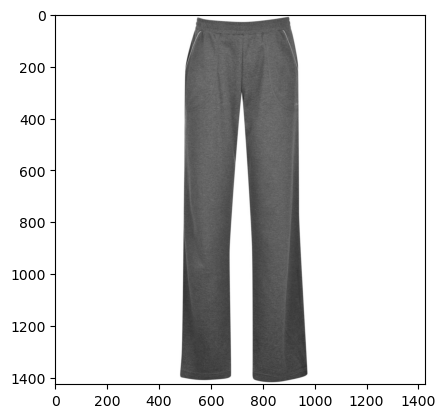

In [12]:
#rifaccio lo stesso procedimento
url = "https://s3-eu-west-1.amazonaws.com/images.linnlive.com/547b3d68c93e199cbd048cb886b17ccc/98a4abe2-155b-4fad-a4ec-21af2deb438f.jpg"
image2 = io.imread(url)
plt.imshow(image2)

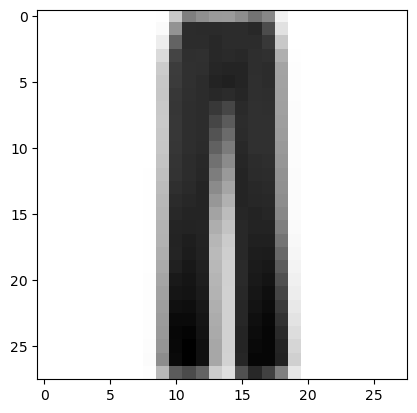

In [13]:
image_small = resize(image2, (28,28))       #faccio un reshape in dimensioni 28*28
image_grey = rgb2gray(image_small)          #la riporto in scala di grigi
x = image_grey.reshape(1, 28*28)            #codifichiamo la matrice dell'immagine in un singolo vettore
plt.imshow(x.reshape(28,28), cmap='grey')   #visualizzo l'immagine

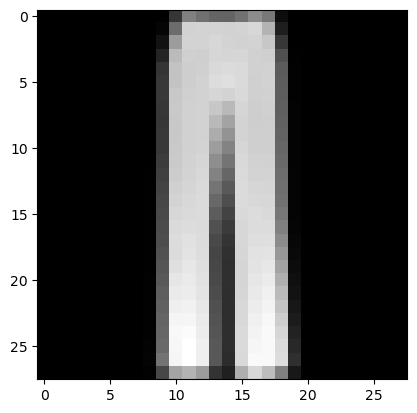

In [14]:
x = 1 - x       #dato che lo 0 significa pixel totalmente nero e 1 bianco, inverto togliendo 1
plt.imshow(x.reshape(28,28), cmap='grey')

In [15]:
pred = np.argmax(model.predict(x), axis=-1)     #lavora sull'ultima dimensione(axis=1) trivando il massimo (argmax)
pred                                        #predizione con probabilità più alta -> classe 1 -> corretto!

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


array([1])